Install Dependencies

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


Verifying Pretrained Model

In [ ]:
from ultralytics import YOLO
from PIL import Image

# Load the YOLO model
model = YOLO('yolo11n.pt')

# Open the local image file
image = Image.open('/content/flir_7- photo.jpg')

# Perform prediction
result = model.predict(image, conf=0.25)[0]



0: 480x640 1 car, 45.8ms
Speed: 22.2ms preprocess, 45.8ms inference, 721.2ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
result.boxes.xyxy

tensor([[225.7459, 235.8108, 358.8925, 287.1366]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.8823], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([2.], device='cuda:0')

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

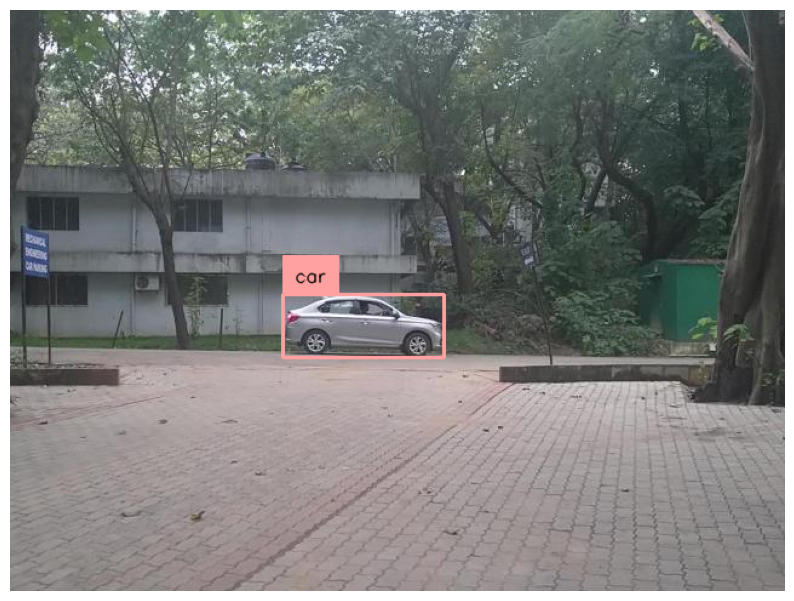

In [ ]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

Download Dataset

Finetuning

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 67.2MB/s]
New https://pypi.org/project/ultralytics/8.3.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/annotations-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1735795953.f5f227b5c4ed.1459.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1890.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1891.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1892.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


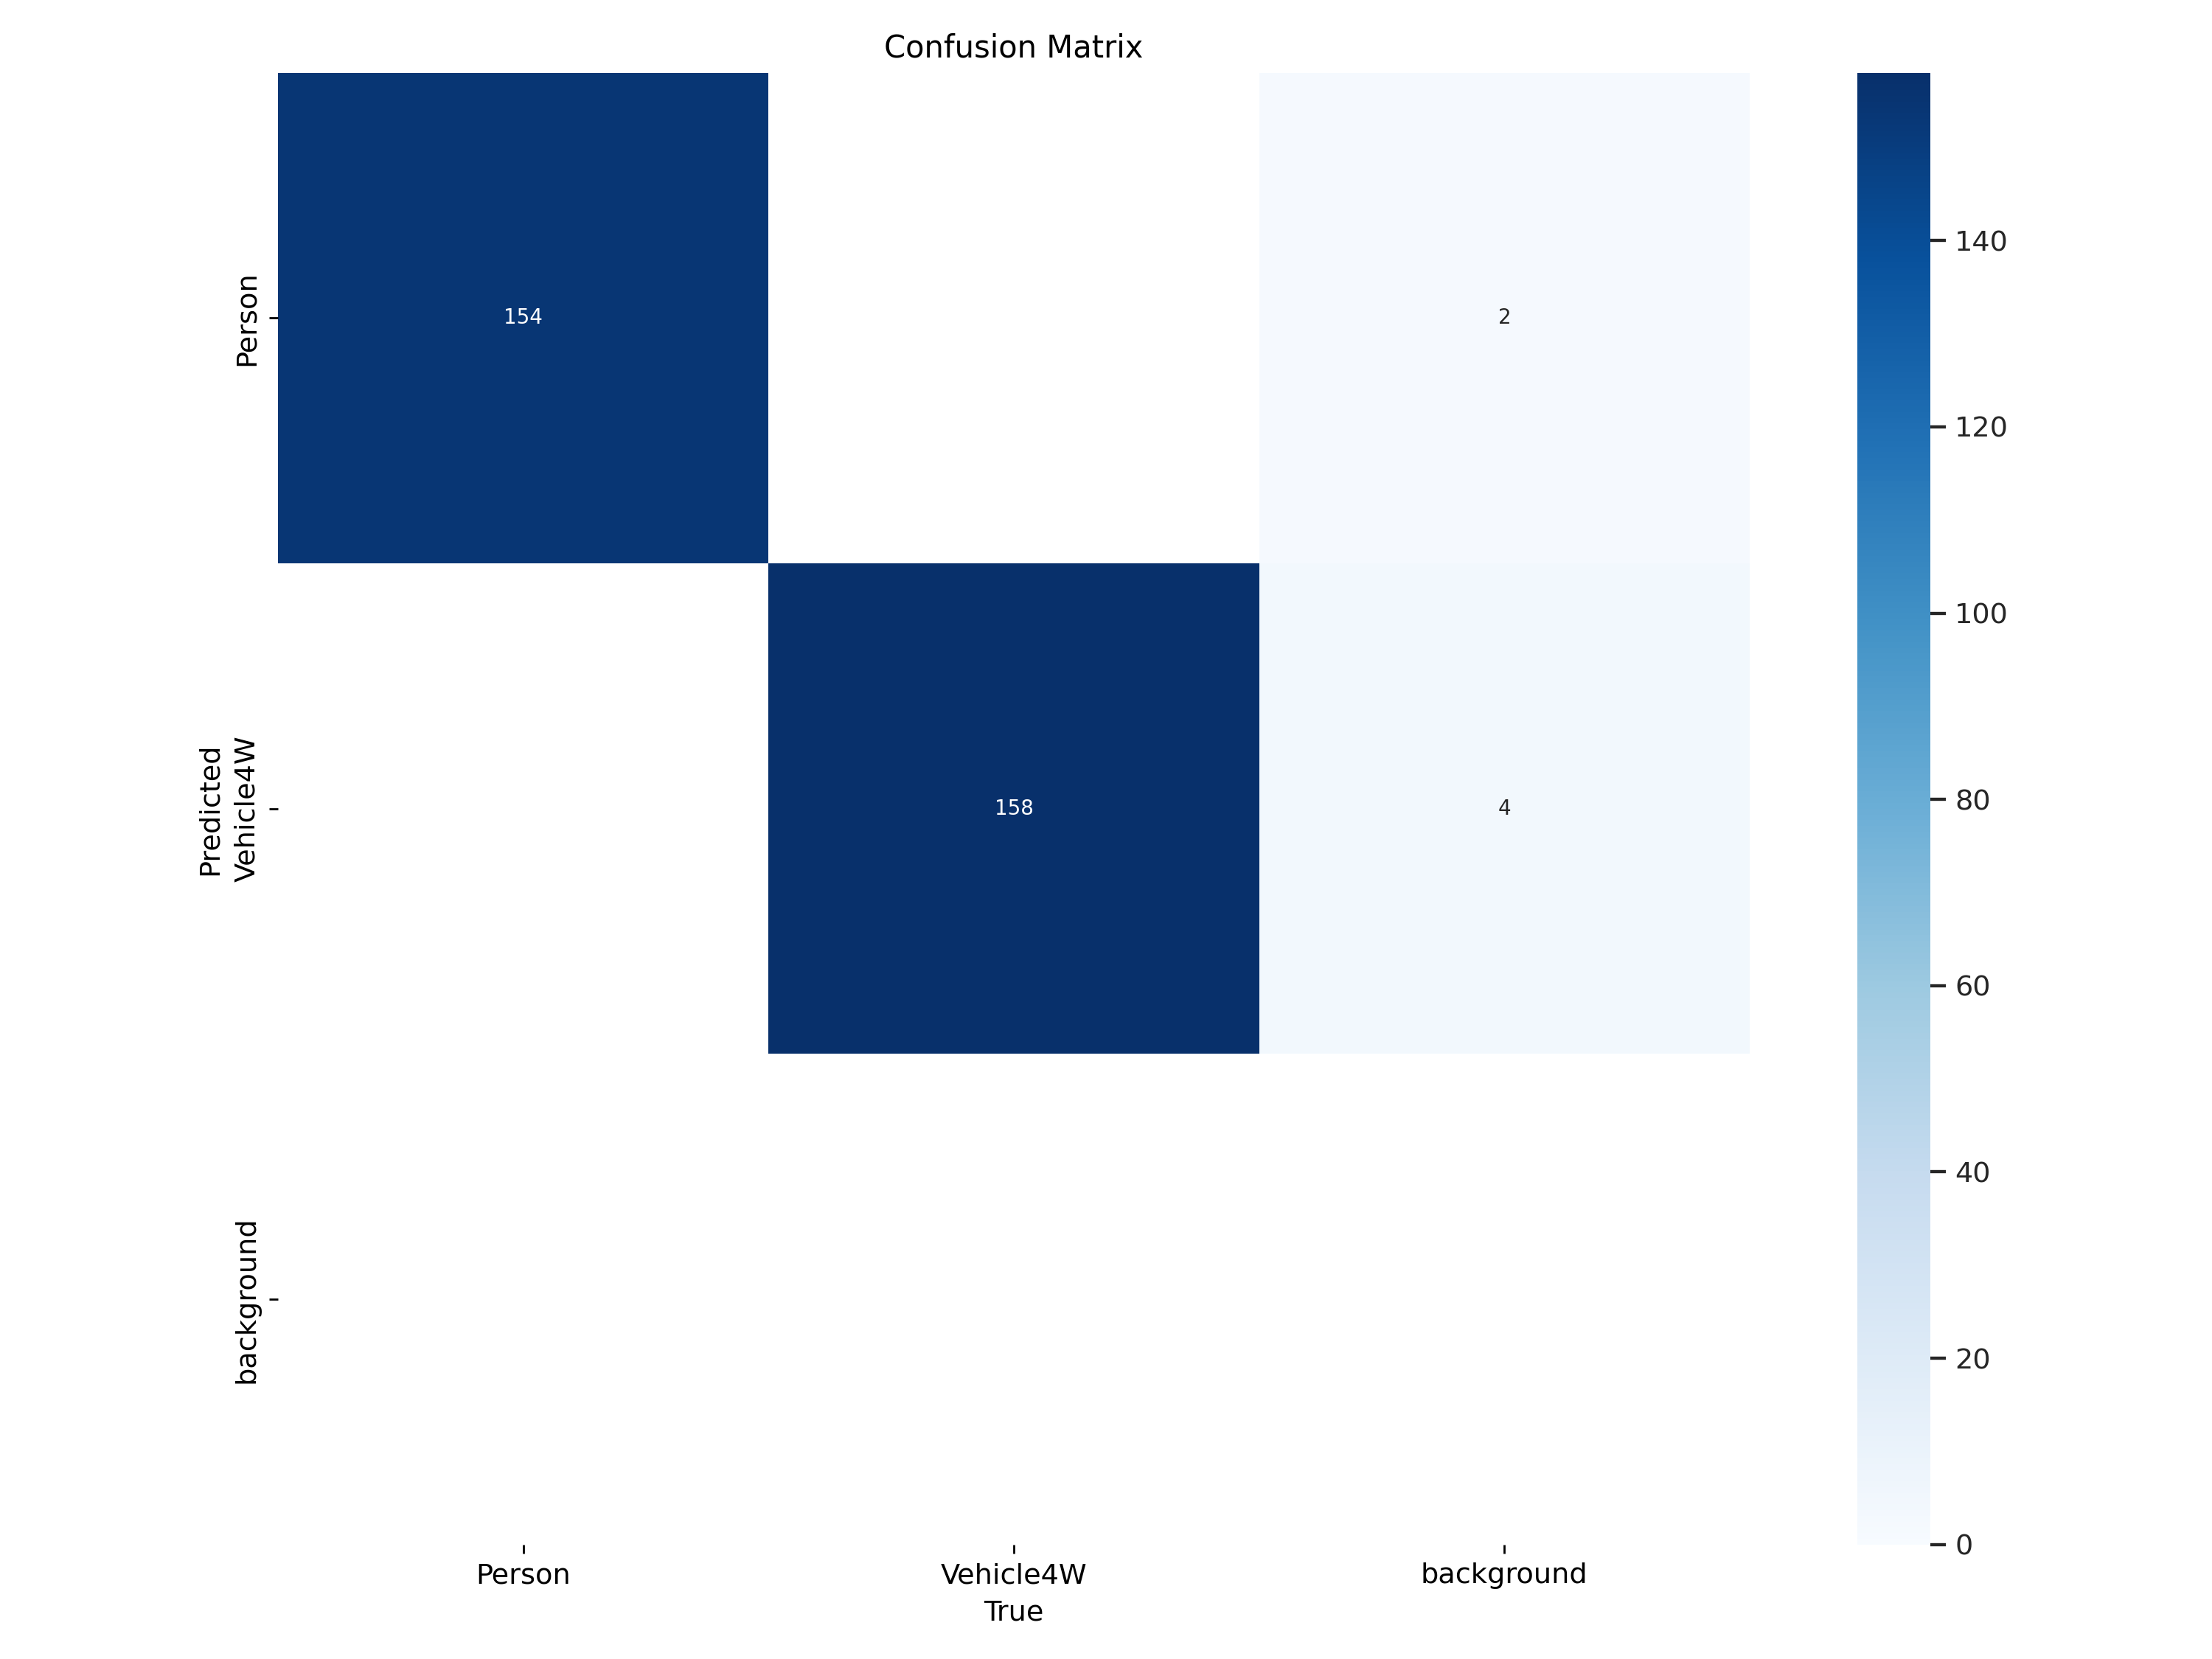

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

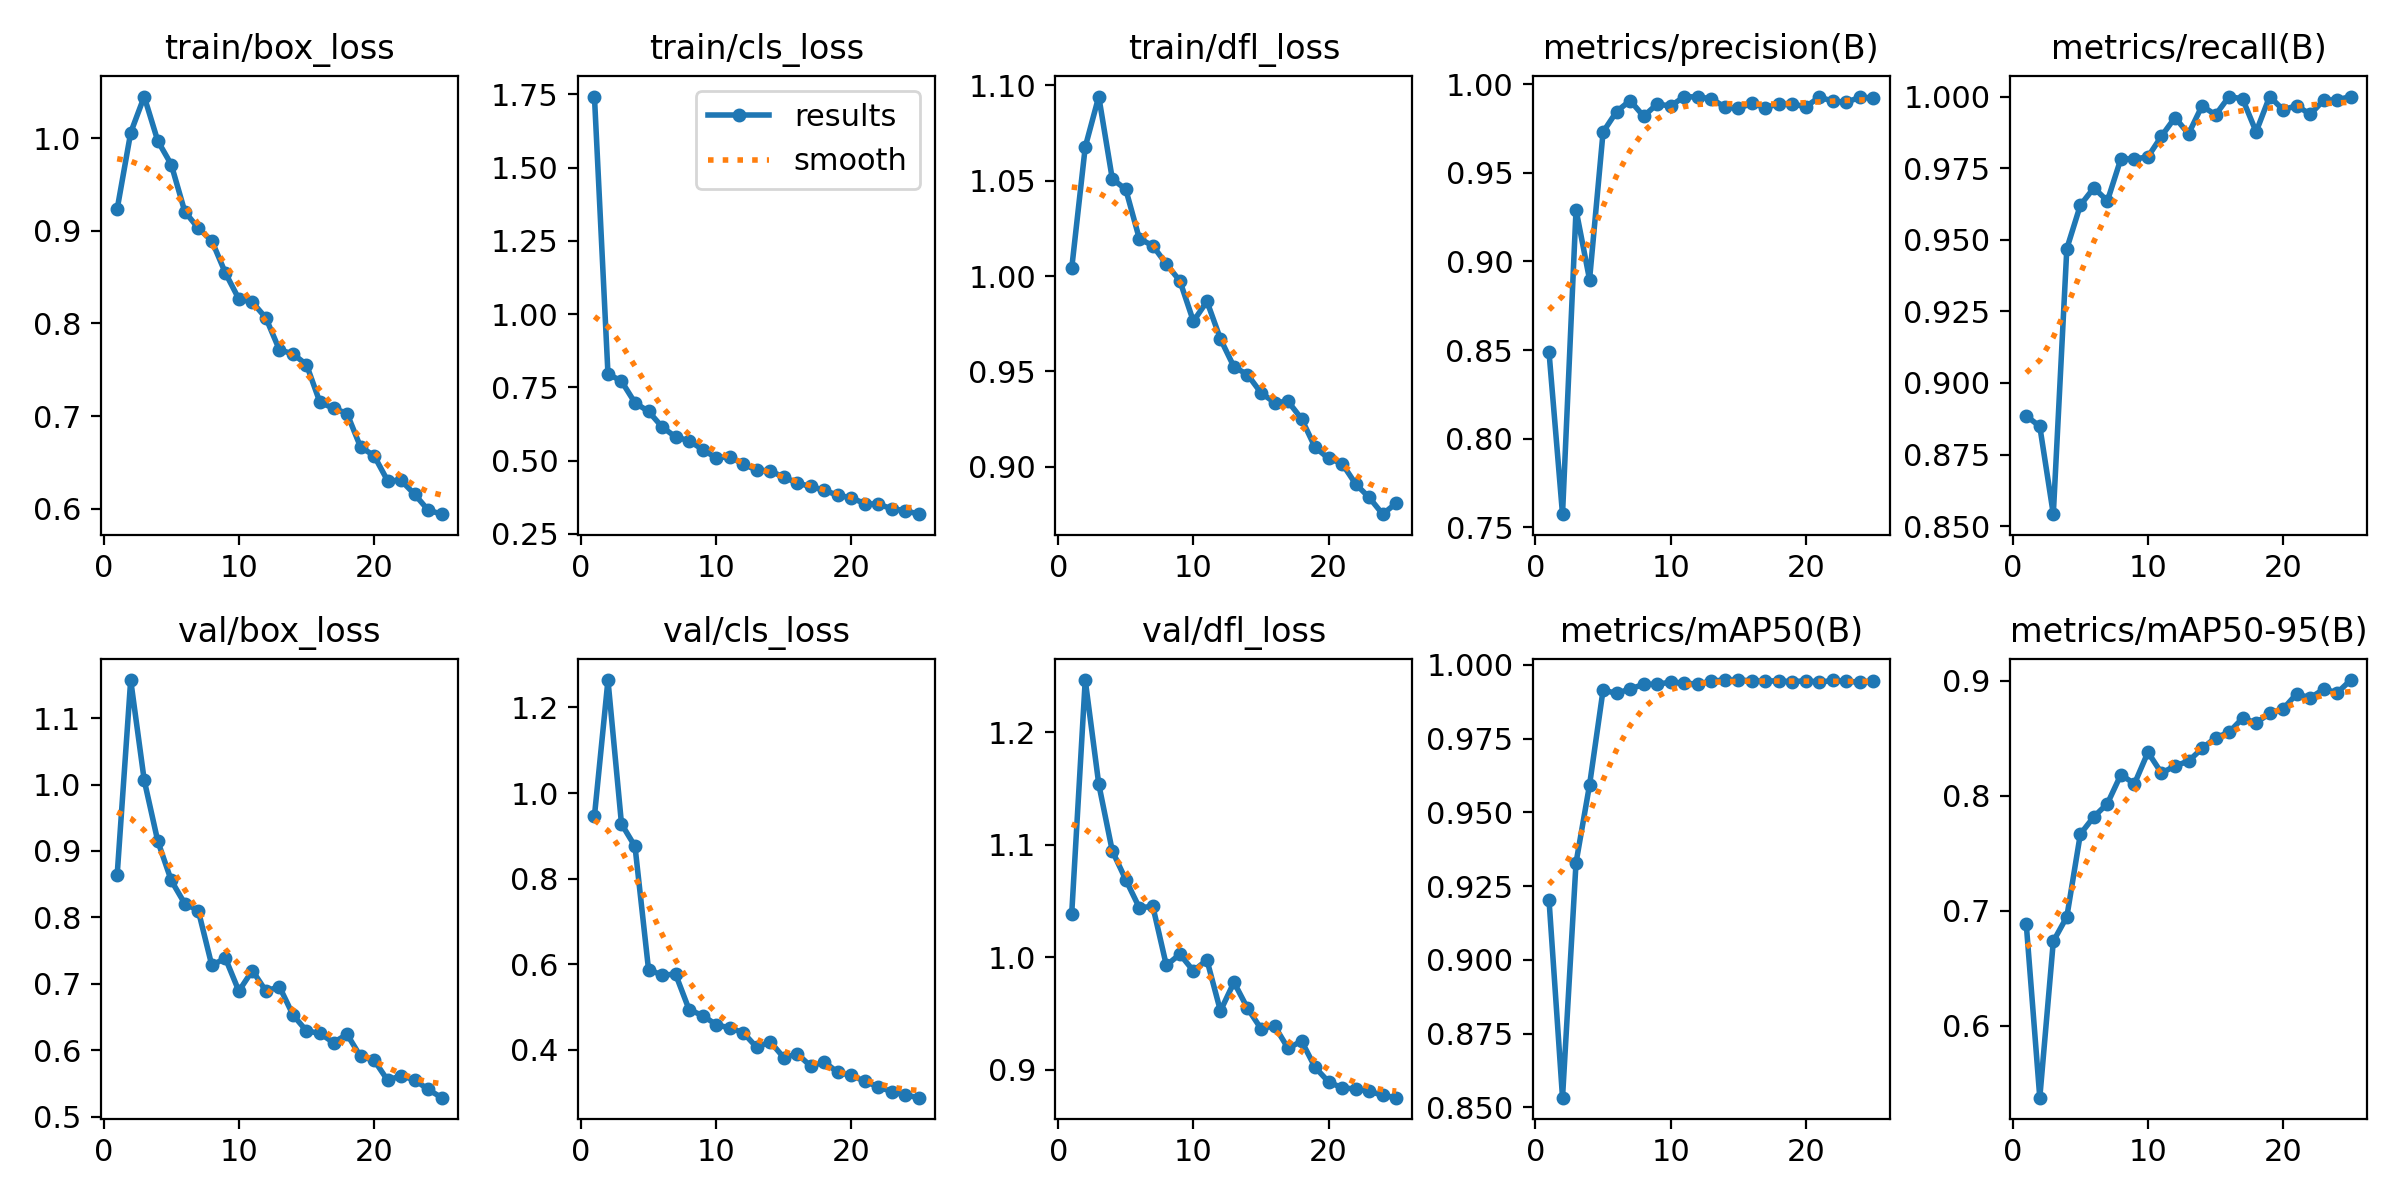

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

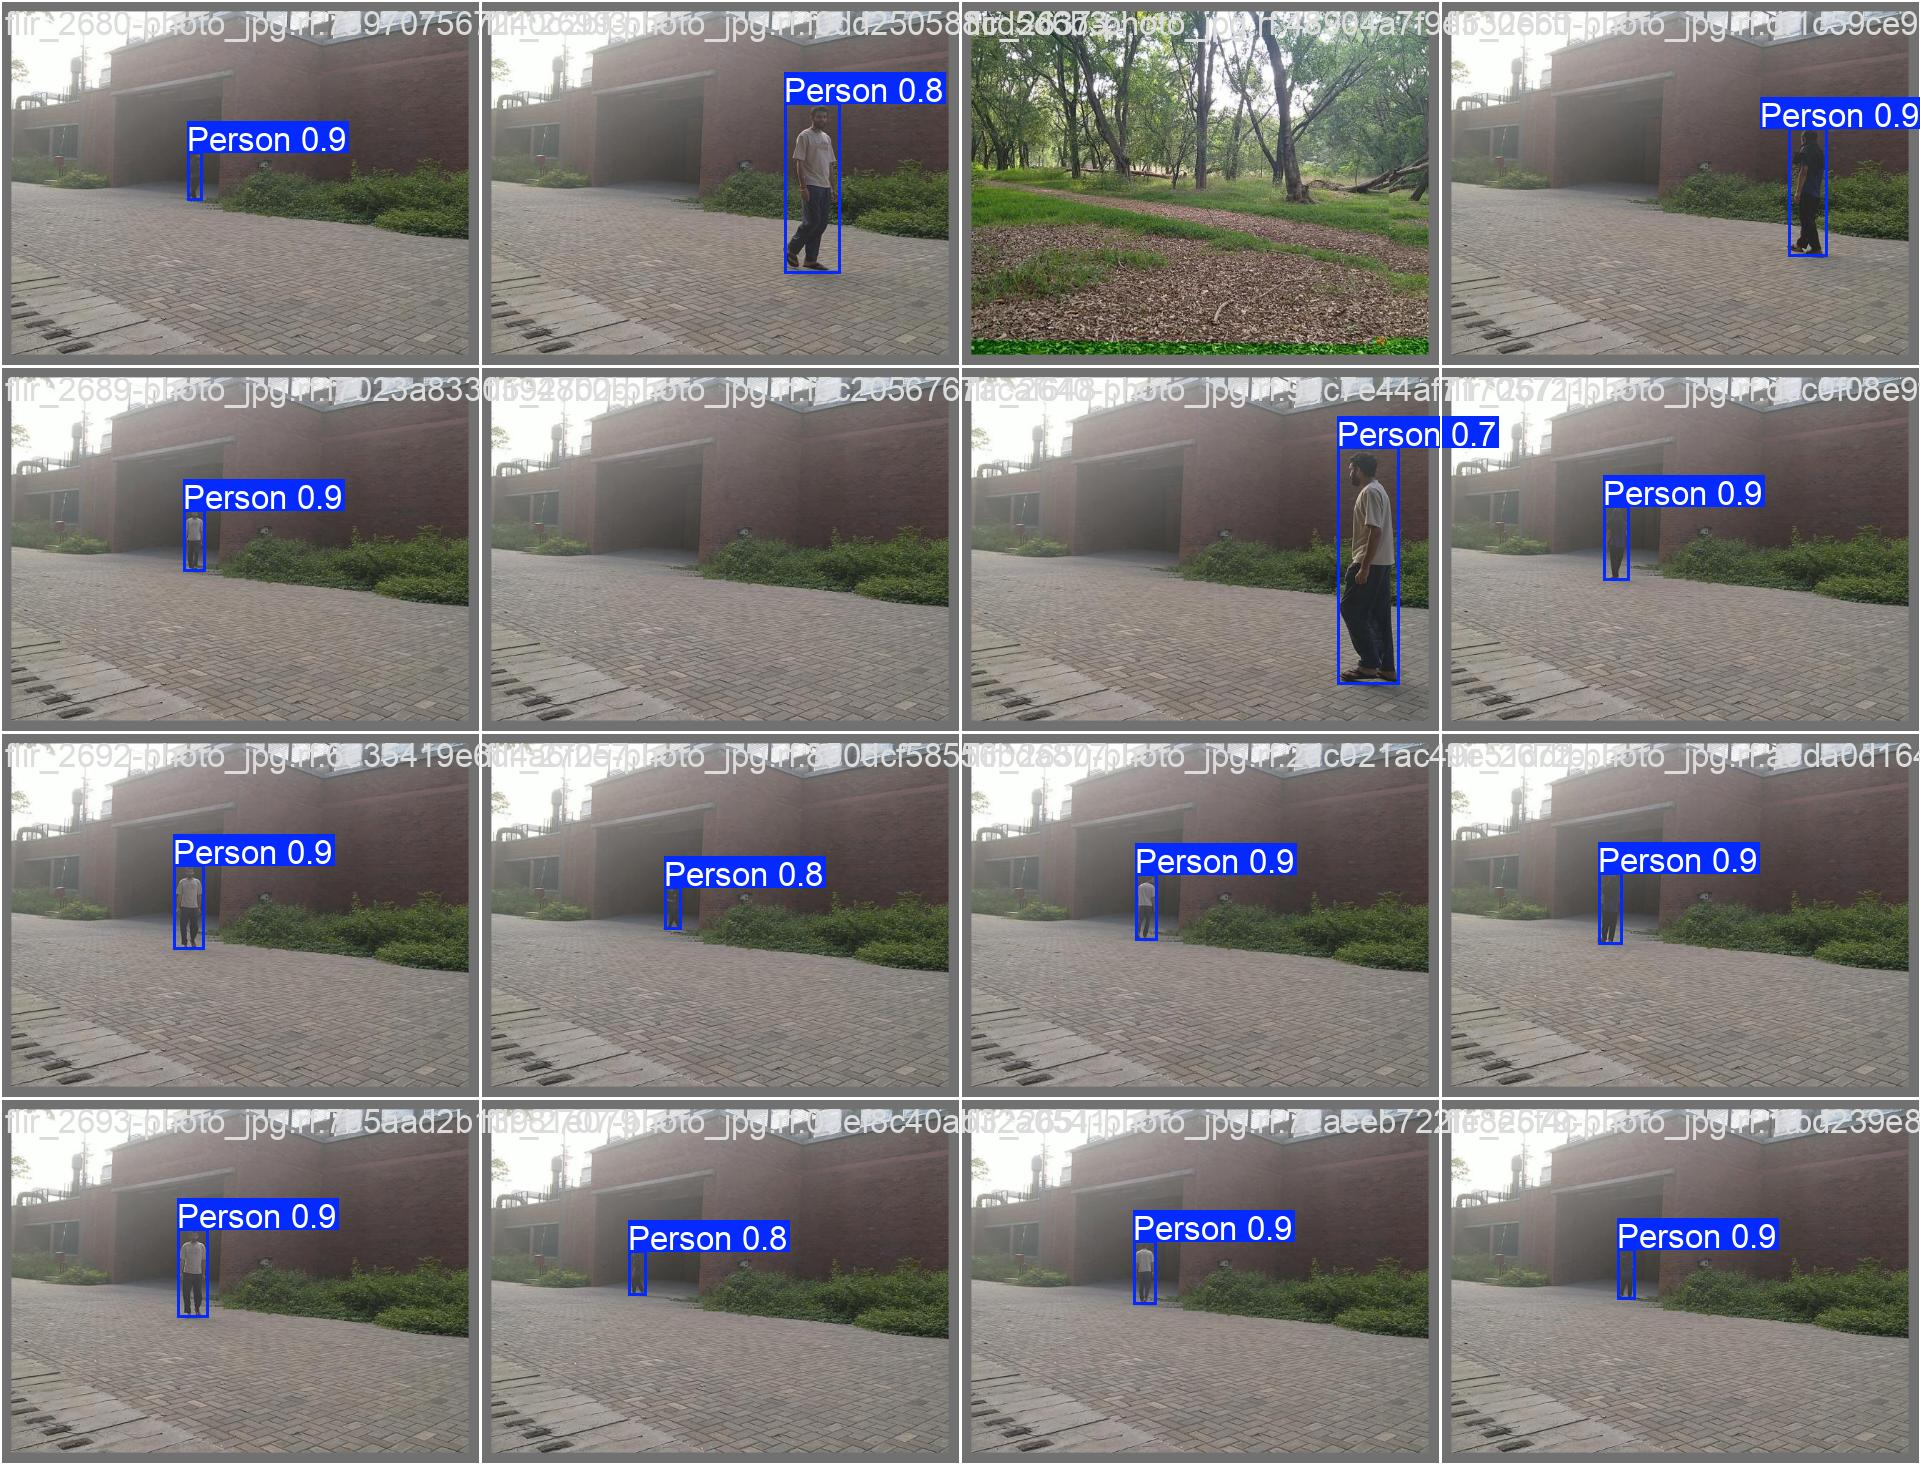

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Evaluation

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/annotations-1/valid/labels.cache... 346 images, 34 backgrounds, 0 corrupt: 100% 346/346 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:05<00:00,  4.34it/s]
                   all        346        312      0.992          1      0.995      0.899
                Person        154        154      0.992          1      0.994      0.868
             Vehicle4W        158        158      0.993          1      0.995      0.931
Speed: 1.1ms preprocess, 7.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml split=test

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/390 /content/annotations-1/test/images/flir_1003-photo_jpg.rf.10f2bb5a7c5b3148e8bf518c018baeaf.jpg: 480x640 1 Vehicle4W, 48.6ms
image 2/390 /content/annotations-1/test/images/flir_1016-photo_jpg.rf.cc0027c2adc74ee15fb4442852c322e9.jpg: 480x640 1 Vehicle4W, 12.5ms
image 3/390 /content/annotations-1/test/images/flir_1018-photo_jpg.rf.ae6e9434045baf0285d1cffff4f14abe.jpg: 480x640 1 Vehicle4W, 12.4ms
image 4/390 /content/annotations-1/test/images/flir_1019-photo_jpg.rf.c2d257b42d937103506f6212bb5e32aa.jpg: 480x640 1 Vehicle4W, 12.4ms
image 5/390 /content/annotations-1/test/images/flir_1026-photo_jpg.rf.c544836041a57ea1e99778b3cb2da273.jpg: 480x640 1 Vehicle4W, 12.4ms
image 6/390 /content/annotations-1/test/images/flir_1027-photo_jpg.rf.1bf58eff39e10e04fa9f1b7c7c3b259a.jpg: 480x640 1 Vehicle4W, 12.4ms
image 7/390 /cont

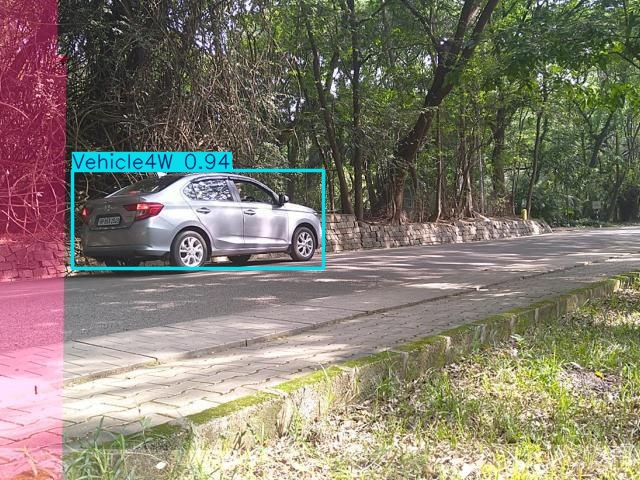

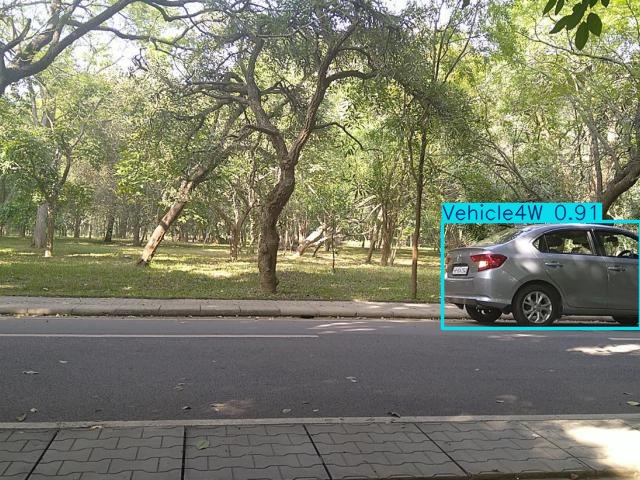

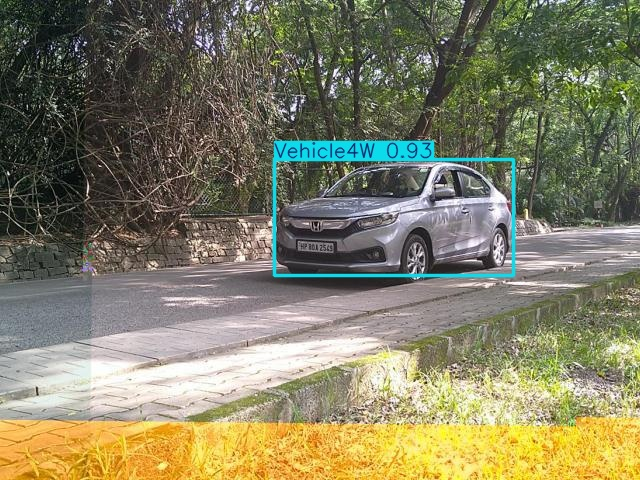

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")